### Load data, create an Analyzer object

In [1]:
from sklearn import datasets
import pandas as pd
pd.set_option('display.max_columns', None)
import sys
sys.path.append('../../')

breast_cancer = datasets.load_breast_cancer()
data = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)
target = pd.Series(breast_cancer.target, name='target').map(
    {0: 'A', 1: 'B'},
)
df = pd.concat([data, target], axis=1)

import tabularmagic as tm
analyzer = tm.Analyzer(df, test_size=0.3, name='Breast cancer sklearn dataset')
analyzer

INFO: Analyzer initialized. Shapes of train, test DataFrames: (398, 31), (171, 31). 


Breast cancer sklearn dataset 
----------------------------------------------------------------------------------------
Train shape: (398, 31)                      Test shape: (171, 31)                       
----------------------------------------------------------------------------------------
Categorical variables:
  'target' 
                                                                                        
Numerical variables:
  'meanradius', 'meantexture', 'meanperimeter', 'meanarea', 'meansmoothness', 
  'meancompactness', 'meanconcavity', 'meanconcavepoints', 'meansymmetry', 
  'meanfractaldimension', 'radiuserror', 'textureerror', 'perimetererror', 'areaerror', 
  'smoothnesserror', 'compactnesserror', 'concavityerror', 'concavepointserror', 
  'symmetryerror', 'fractaldimensionerror', 'worstradius', 'worsttexture', 
  'worstperimeter', 'worstarea', 'worstsmoothness', 'worstcompactness', 
  'worstconcavity', 'worstconcavepoints', 'worstsymmetry', 'worstfractaldimension'

### Exploratory data analysis

In [3]:
analyzer.eda().numerical_summary_statistics()

,meanradius,meantexture,meanperimeter,meanarea,meansmoothness,meancompactness,meanconcavity,meanconcavepoints,meansymmetry,meanfractaldimension,radiuserror,textureerror,perimetererror,areaerror,smoothnesserror,compactnesserror,concavityerror,concavepointserror,symmetryerror,fractaldimensionerror,worstradius,worsttexture,worstperimeter,worstarea,worstsmoothness,worstcompactness,worstconcavity,worstconcavepoints,worstsymmetry,worstfractaldimension
Statistic,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
min,7.691000,9.710000,48.340000,170.400000,0.062510,0.019380,0.000000,0.000000,0.116700,0.049960,0.111500,0.360200,0.757000,6.802000,0.002667,0.002252,0.000000,0.000000,0.007882,0.000895,8.678000,12.020000,54.490000,223.600000,0.081250,0.034320,0.000000,0.000000,0.156500,0.055040
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.311400,0.426800,0.201200,0.304000,0.097440,2.873000,3.647000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.061460,0.029840,36.040000,49.540000,251.200000,4254.000000,0.218400,0.937900,0.903400,0.275600,0.663800,0.173000
mean,14.176078,19.159171,92.256332,659.770854,0.095962,0.103303,0.088071,0.048440,0.180308,0.062664,0.404789,1.203627,2.875302,40.597329,0.007054,0.025356,0.032259,0.011926,0.020372,0.003791,16.287322,25.505553,107.363844,881.848241,0.131772,0.249086,0.268497,0.113839,0.288300,0.083537
std,3.535730,4.214074,24.289529,358.865452,0.013766,0.051209,0.077836,0.037712,0.026871,0.007248,0.290452,0.519348,2.114108,48.883639,0.003114,0.017995,0.030055,0.006234,0.008016,0.002651,4.799691,6.017564,33.083204,570.753903,0.023023,0.148622,0.196139,0.063886,0.062318,0.017518
variance,12.501385,17.758420,589.981216,128784.412347,0.000190,0.002622,0.006058,0.001422,0.000722,0.000053,0.084363,0.269722,4.469452,2389.610152,0.000010,0.000324,0.000903,0.000039,0.000064,0.000007,23.037038,36.211075,1094.498372,325760.018322,0.000530,0.022088,0.038471,0.004081,0.003884,0.000307
skew,1.020942,0.788515,1.071706,1.780828,0.634088,1.029196,1.374224,1.158541,0.710506,1.493977,3.466718,1.302691,3.846859,5.888923,2.633633,1.981286,5.296554,1.707014,2.145523,4.059109,1.142907,0.503990,1.152626,1.961466,0.454646,1.336997,0.853060,0.487419,1.610931,1.371090
kurtosis,1.101042,1.454095,1.260187,4.377761,1.261319,0.981097,1.948908,1.135877,1.278645,3.830137,20.388889,2.635602,24.604923,51.510971,12.522039,5.680064,54.102516,6.553743,6.321593,28.929743,1.137586,0.312484,1.250171,5.061280,0.315390,2.662335,0.218653,-0.557116,5.539011,2.727971
q1,11.752500,16.170000,75.805000,426.175000,0.085550,0.063407,0.029585,0.020692,0.161575,0.057665,0.236150,0.836950,1.679250,18.160000,0.005080,0.012783,0.015180,0.007910,0.015200,0.002252,13.075000,21.070000,84.542500,521.550000,0.114325,0.147325,0.116475,0.063885,0.247775,0.071155
median,13.275000,18.700000,85.980000,546.250000,0.094625,0.091280,0.061880,0.034110,0.178800,0.061325,0.319400,1.108000,2.278500,24.830000,0.006413,0.020500,0.026140,0.011160,0.018695,0.003219,14.975000,25.155000,97.745000,687.600000,0.131150,0.209250,0.226200,0.099270,0.280750,0.080165


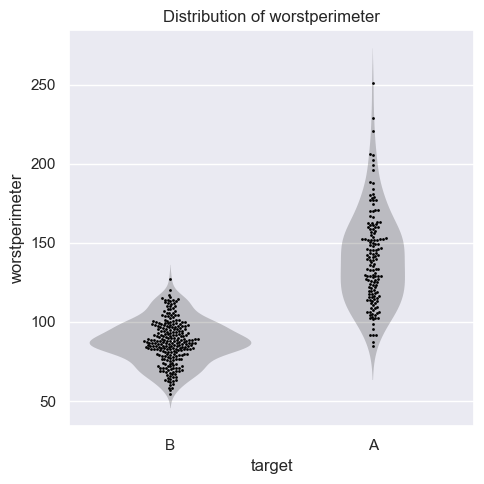

In [4]:
analyzer.eda().plot_distribution_stratified(
    'worstperimeter', 'target', strategy='violin_swarm')

### Preprocess the data

In [5]:
analyzer.datahandler().load_data_checkpoint().\
    force_binary(['target'], pos_labels=['B']).\
    scale(
        include_vars=analyzer.datahandler().numerical_vars(),
        exclude_vars=['B_yn(target)'],
        strategy='standardize'
    ).save_data_checkpoint('finished preprocessing')

INFO: Working DataFrames reset to original DataFrames. Shapes of train, test DataFrames: 
      (398, 31), (171, 31). 
INFO: Forced variables 'target' to binary. Variables renamed to 'B_yn(target)'. 
INFO: Scaled variables 'worstarea', 'perimetererror', 'areaerror', 'worstcompactness', 
      'meanconcavity', 'concavityerror', 'symmetryerror', 'worstradius', 'meanarea', 
      'meanfractaldimension', 'worstconcavity', 'radiuserror', 'meancompactness', 
      'meanconcavepoints', 'meanperimeter', 'worstperimeter', 'textureerror', 
      'worstconcavepoints', 'smoothnesserror', 'fractaldimensionerror', 
      'meansmoothness', 'worsttexture', 'compactnesserror', 'meansymmetry', 
      'concavepointserror', 'worstsmoothness', 'meanradius', 'worstfractaldimension', 
      'worstsymmetry', 'meantexture' using strategy standardize. 
INFO: Saved working DataFrames checkpoint finished preprocessing. 


Breast cancer sklearn dataset 
----------------------------------------------------------------------------------------
Train shape: (398, 31)                      Test shape: (171, 31)                       
----------------------------------------------------------------------------------------
Categorical variables:
  None 
                                                                                        
Numerical variables:
  'meanradius', 'meantexture', 'meanperimeter', 'meanarea', 'meansmoothness', 
  'meancompactness', 'meanconcavity', 'meanconcavepoints', 'meansymmetry', 
  'meanfractaldimension', 'radiuserror', 'textureerror', 'perimetererror', 'areaerror', 
  'smoothnesserror', 'compactnesserror', 'concavityerror', 'concavepointserror', 
  'symmetryerror', 'fractaldimensionerror', 'worstradius', 'worsttexture', 
  'worstperimeter', 'worstarea', 'worstsmoothness', 'worstcompactness', 
  'worstconcavity', 'worstconcavepoints', 'worstsymmetry', 'worstfractaldimension', 
 

In [11]:
analyzer.datahandler().load_data_checkpoint('finished preprocessing')
report = analyzer.ml_classification(
    models=[
        tm.ml.LinearC('l1'),
        tm.ml.LinearC(
            'l2',
            feature_selectors=[
                tm.fs.KBestSelectorC('f_classif')
            ],
            max_n_features=5
        ),
        tm.ml.CustomC(
            
        )
    ],
    target='B_yn(target)',
    feature_selectors=[
        tm.fs.KBestSelectorC('f_classif')
    ],
    max_n_features=10,
    outer_cv=5
)

INFO: Working DataFrames reset to checkpoint finished preprocessing. Shapes of train, 
      test DataFrames: (398, 31), (171, 31). 
PROG: Fitting KBestSelectorC(f_classif). 
PROG: Fitting KBestSelectorC(f_classif). 
PROG: Fitting KBestSelectorC(f_classif). 
PROG: Fitting KBestSelectorC(f_classif). 
PROG: Fitting KBestSelectorC(f_classif). 
PROG: Fitting KBestSelectorC(f_classif). 
INFO: Evaluating model LinearC(l1). 
PROG: Fitting LinearC(l1). Search method: OptunaSearchCV (100 trials). 
PROG: Fitting LinearC(l1). Search method: OptunaSearchCV (100 trials). 
PROG: Fitting LinearC(l1). Search method: OptunaSearchCV (100 trials). 
PROG: Fitting LinearC(l1). Search method: OptunaSearchCV (100 trials). 
PROG: Fitting LinearC(l1). Search method: OptunaSearchCV (100 trials). 
PROG: Fitting LinearC(l1). Search method: OptunaSearchCV (100 trials). 
INFO: Successfully evaluated model LinearC(l1). 
INFO: Evaluating model LinearC(l2). 
PROG: Fitting KBestSelectorC(f_classif). 
PROG: Fitting Line

In [14]:
report.cv_metrics(average_across_folds=False)

LinearC(l1) LinearC(l2)
Fold Statistic                        
0    accuracy         0.95      0.9375
     f1               0.96    0.950495
     precision    0.941176    0.923077
     recall       0.979592    0.979592
     roc_auc      0.967084    0.967084
     n                  80          80
1    accuracy        0.925      0.9375
     f1           0.941176    0.951456
     precision    0.923077    0.924528
     recall           0.96        0.98
     roc_auc         0.984       0.984
     n                  80          80
2    accuracy       0.9625      0.9625
     f1           0.971963    0.971963
     precision    0.962963    0.962963
     recall       0.981132    0.981132
     roc_auc      0.986024    0.984626
     n                  80          80
3    accuracy     0.974684    0.962025
     f1           0.981481    0.971963
     precision    0.963636    0.962963
     recall            1.0    0.981132
     roc_auc      0.992743     0.98984
     n                  79          79
4    accuracy     0.962025    0.962025
     f1           0.964706    0.964706
     precision         1.0         1.0
     recall       0.931818    0.931818
     roc_auc      0.997403    0.998052
     n                  79          79

In [8]:
report.model_report('LinearC(l2)').feature_selection_report().top_features()

['worstradius',
 'worstperimeter',
 'meanconcavepoints',
 'worstconcavepoints',
 'meanperimeter']

In [10]:
report.metrics('train')

,LinearC(l1)
Statistic,
accuracy,0.962312
f1,0.970179
precision,0.96063
recall,0.97992
roc_auc,0.988707
n,398


In [12]:
report.metrics('test')

,LinearC(l1)
Statistic,
accuracy,0.964912
f1,0.971963
precision,0.981132
recall,0.962963
roc_auc,0.995003
n,171


In [9]:
report.fit_statistics('train')

,LinearC(l1)
Statistic,
accuracy,0.934673
f1,0.947368
precision,0.955102
recall,0.939759
roc_auc,0.981645
n,398


In [13]:
report.cv_metrics()

,LinearC(l1)
Statistic,
accuracy,0.954842
f1,0.963865
precision,0.958171
recall,0.970508
roc_auc,0.985451
n,79.6


In [14]:
report.cv_metrics(average_across_folds=False)

LinearC(l1)
Fold Statistic            
0    accuracy         0.95
     f1               0.96
     precision    0.941176
     recall       0.979592
     roc_auc      0.967084
     n                  80
1    accuracy        0.925
     f1           0.941176
     precision    0.923077
     recall           0.96
     roc_auc         0.984
     n                  80
2    accuracy       0.9625
     f1           0.971963
     precision    0.962963
     recall       0.981132
     roc_auc      0.986024
     n                  80
3    accuracy     0.974684
     f1           0.981481
     precision    0.963636
     recall            1.0
     roc_auc      0.992743
     n                  79
4    accuracy     0.962025
     f1           0.964706
     precision         1.0
     recall       0.931818
     roc_auc      0.997403
     n                  79

In [15]:
report.model_report('LinearC(l1)').train_report().metrics()

,LinearC(l1)
Statistic,
accuracy,0.962312
f1,0.970179
precision,0.96063
recall,0.97992
roc_auc,0.988707
n,398


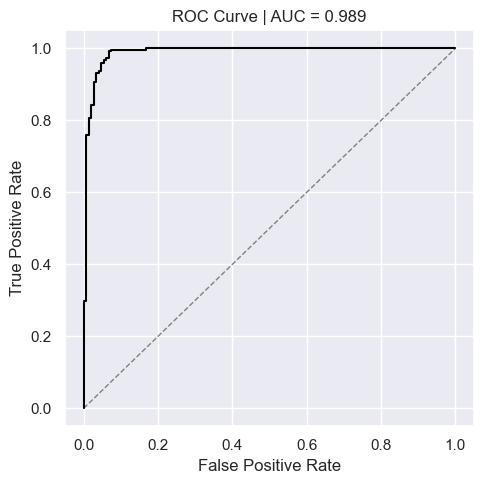

In [16]:
report.model_report('LinearC(l1)').train_report().plot_roc_curve()

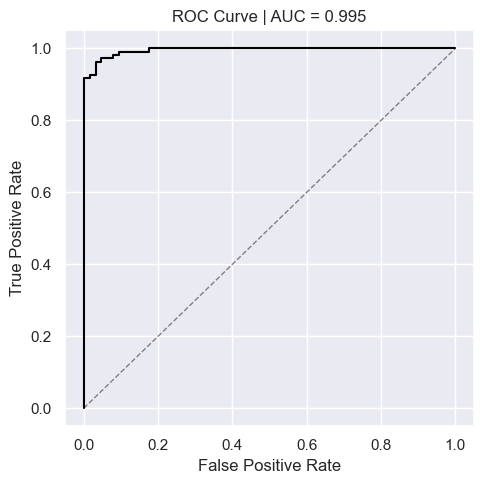

In [17]:
report.model_report('LinearC(l1)').test_report().plot_roc_curve()